In [1]:
import os, sys
sys.path.append(os.path.abspath('../../'))
import pandas as pd
import numpy as np
from EMAWorkbench import load_results
from utils.rl.hv import HyperVolume

def compute_hypervolume(df, antiutopia, utopia):
    array = df.values
    hv_computer = HyperVolume(antiutopia, utopia)
    return hv_computer.compute(array)

/Users/zppei/Documents/PhD-Project/code/Evolutionary/EMAWorkbench/em_framework/evaluators.py:21: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn(
/Users/zppei/Documents/PhD-Project/code/Evolutionary/EMAWorkbench/em_framework/optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)


# Discrete Lake Problem

In [2]:
results_path='../../results/lake_discrete_performance_2/'
files=sorted(os.listdir(results_path))
files

['.DS_Store',
 'ea_1274569960',
 'ea_1350287007',
 'ea_1883682950',
 'ea_1926216712',
 'ea_2097286424',
 'ea_2523200676',
 'ea_2861224539',
 'ea_3087161096',
 'ea_3186775264',
 'ea_3624030427',
 'ea_3668976038',
 'ea_3690172787',
 'ea_3885705317',
 'ea_462638671',
 'ea_562732020',
 'ea_617160326',
 'ea_674137616',
 'ea_703574460',
 'ea_956500800',
 'ea_96930842',
 'nes_1274569960_13-03-2023-23-03_best.csv',
 'nes_1274569960_13-03-2023-23-04_high.csv',
 'nes_1350287007_13-03-2023-23-04_best.csv',
 'nes_1350287007_13-03-2023-23-05_high.csv',
 'nes_1883682950_13-03-2023-23-05_best.csv',
 'nes_1883682950_13-03-2023-23-06_high.csv',
 'nes_1926216712_13-03-2023-23-06_best.csv',
 'nes_1926216712_13-03-2023-23-07_high.csv',
 'nes_2097286424_13-03-2023-23-08_best.csv',
 'nes_2097286424_13-03-2023-23-08_high.csv',
 'nes_2523200676_13-03-2023-23-09_best.csv',
 'nes_2523200676_13-03-2023-23-09_high.csv',
 'nes_2861224539_13-03-2023-23-10_best.csv',
 'nes_2861224539_13-03-2023-23-10_high.csv',
 'ne

In [3]:
ea_hv = []
for i in range(1, 21):
    ea=[]
    ea_files = sorted(os.listdir(results_path + files[i]))
    for j in range(len(ea_files)):
        _, all_outcomes=load_results(results_path + files[i] + "/" + ea_files[j])
        all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ('utility', 'reliability'))
        ea.append(all_outcomes)
        # print(ea_files[j])
    ea=pd.DataFrame(ea)
    each_ea_hv = compute_hypervolume(ea, np.array([0, 0]), np.array([1.8, 1]))
    ea_hv.append(each_ea_hv)
    print(files[i])
    # print(ea)
    print(each_ea_hv)
ea_hv = np.array(ea_hv)
print(ea_hv.mean())
print(ea_hv.std())

ea_1274569960
0.46974851471859136
ea_1350287007
0.4897170696654648
ea_1883682950
0.48833562272720055
ea_1926216712
0.4891680486619489
ea_2097286424
0.473784084608725
ea_2523200676
0.47851566165342735
ea_2861224539
0.4983044022581321
ea_3087161096
0.4927065638107669
ea_3186775264
0.5178979953839811
ea_3624030427
0.511650570797871
ea_3668976038
0.5299832887075302
ea_3690172787
0.4996117377732343
ea_3885705317
0.5173302289970199
ea_462638671
0.5178431748832563
ea_562732020
0.4960426833774433
ea_617160326
0.44344056537470733
ea_674137616
0.5255547008282675
ea_703574460
0.48861722253016415
ea_956500800
0.5192234714007831
ea_96930842
0.4891897211422372
0.49683326646503767
0.020900022237349766


In [4]:
nes_hv = []
for i in range(21, 61, 2):
    path = files[i]
    nes = pd.read_csv(results_path + path)
    each_nes_hv = compute_hypervolume(nes, np.array([0, 0]), np.array([1.8, 1]))
    nes_hv.append(each_nes_hv)
    print(path)
    # print(nes)
    print(each_nes_hv)
nes_hv = np.array(nes_hv)
print(nes_hv.mean())
print(nes_hv.std())

nes_1274569960_13-03-2023-23-03_best.csv
0.5092337802613222
nes_1350287007_13-03-2023-23-04_best.csv
0.49276450369926267
nes_1883682950_13-03-2023-23-05_best.csv
0.48477643937042664
nes_1926216712_13-03-2023-23-06_best.csv
0.5189223987402595
nes_2097286424_13-03-2023-23-08_best.csv
0.4896518983310474
nes_2523200676_13-03-2023-23-09_best.csv
0.4848521528109674
nes_2861224539_13-03-2023-23-10_best.csv
0.497715047872405
nes_3087161096_13-03-2023-23-11_best.csv
0.4846939030445376
nes_3186775264_13-03-2023-23-12_best.csv
0.4914326361121318
nes_3624030427_13-03-2023-23-13_best.csv
0.4796524198966906
nes_3668976038_13-03-2023-23-14_best.csv
0.47799850566880653
nes_3690172787_13-03-2023-23-15_best.csv
0.4865097844054993
nes_3885705317_13-03-2023-23-17_best.csv
0.4946504183262283
nes_462638671_13-03-2023-23-18_best.csv
0.48965212446035167
nes_562732020_13-03-2023-23-19_best.csv
0.4832683868774264
nes_617160326_13-03-2023-23-21_best.csv
0.4855078867633481
nes_674137616_13-03-2023-23-22_best.csv


In [5]:
repsep_hv = []
for i in range(61, 101, 2):
    path = files[i]
    repsep = pd.read_csv(results_path + path)
    each_repsep_hv = compute_hypervolume(repsep, np.array([0, 0]), np.array([1.8, 1]))
    repsep_hv.append(each_repsep_hv)
    print(path)
    # print(repsep)
    print(each_repsep_hv)
repsep_hv = np.array(repsep_hv)
print(repsep_hv.mean())
print(repsep_hv.std())

repsep_1274569960_13-03-2023-23-27_best.csv
0.4692425909240841
repsep_1350287007_13-03-2023-23-28_best.csv
0.48067234460995295
repsep_1883682950_13-03-2023-23-29_best.csv
0.4920346509668714
repsep_1926216712_13-03-2023-23-30_best.csv
0.48904062215431043
repsep_2097286424_13-03-2023-23-32_best.csv
0.47917281425991687
repsep_2523200676_13-03-2023-23-33_best.csv
0.48641447991316883
repsep_2861224539_13-03-2023-23-34_best.csv
0.4761281501652542
repsep_3087161096_13-03-2023-23-35_best.csv
0.4798165971036679
repsep_3186775264_13-03-2023-23-36_best.csv
0.48178488251718193
repsep_3624030427_13-03-2023-23-37_best.csv
0.48552439398822234
repsep_3668976038_13-03-2023-23-38_best.csv
0.49037686616195797
repsep_3690172787_13-03-2023-23-40_best.csv
0.4808573641510076
repsep_3885705317_13-03-2023-23-41_best.csv
0.4723984793057587
repsep_462638671_13-03-2023-23-42_best.csv
0.4841285108052535
repsep_562732020_13-03-2023-23-43_best.csv
0.47732577874305554
repsep_617160326_13-03-2023-23-44_best.csv
0.4733

In [10]:
ea=[]
ea_files = sorted(os.listdir(results_path + files[4]))
for i in range(len(ea_files)):
    _, all_outcomes=load_results(results_path + files[4] + "/" + ea_files[i])
    all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ('utility', 'reliability'))
    ea.append(all_outcomes)
    print(files[4] + "/" + ea_files[i])
ea=pd.DataFrame(ea)
each_ea_hv = compute_hypervolume(ea, np.array([0, 0]), np.array([1.8, 1]))
ea["Algorithms"]="$\epsilon$-NSGA-II"
print(each_ea_hv)
ea

ea_1926216712/13-03-2023-23-01_0.tar.gz
ea_1926216712/13-03-2023-23-01_1.tar.gz
ea_1926216712/13-03-2023-23-01_10.tar.gz
ea_1926216712/13-03-2023-23-01_11.tar.gz
ea_1926216712/13-03-2023-23-01_12.tar.gz
ea_1926216712/13-03-2023-23-01_13.tar.gz
ea_1926216712/13-03-2023-23-01_14.tar.gz
ea_1926216712/13-03-2023-23-01_15.tar.gz
ea_1926216712/13-03-2023-23-01_16.tar.gz
ea_1926216712/13-03-2023-23-01_17.tar.gz
ea_1926216712/13-03-2023-23-01_18.tar.gz
ea_1926216712/13-03-2023-23-01_19.tar.gz
ea_1926216712/13-03-2023-23-01_2.tar.gz
ea_1926216712/13-03-2023-23-01_20.tar.gz
ea_1926216712/13-03-2023-23-01_21.tar.gz
ea_1926216712/13-03-2023-23-01_22.tar.gz
ea_1926216712/13-03-2023-23-01_23.tar.gz
ea_1926216712/13-03-2023-23-01_24.tar.gz
ea_1926216712/13-03-2023-23-01_25.tar.gz
ea_1926216712/13-03-2023-23-01_26.tar.gz
ea_1926216712/13-03-2023-23-01_27.tar.gz
ea_1926216712/13-03-2023-23-01_28.tar.gz
ea_1926216712/13-03-2023-23-01_29.tar.gz
ea_1926216712/13-03-2023-23-01_3.tar.gz
ea_1926216712/13-03-

,utility,reliability,Algorithms
0,1.061477,0.383838,$\epsilon$-NSGA-II
1,1.092655,0.363636,$\epsilon$-NSGA-II
2,0.860330,0.545455,$\epsilon$-NSGA-II
3,0.839009,0.565657,$\epsilon$-NSGA-II
4,0.818182,0.585859,$\epsilon$-NSGA-II
...,...,...,...
65,1.032396,0.404040,$\epsilon$-NSGA-II
66,1.157480,0.323232,$\epsilon$-NSGA-II
67,0.727080,0.686869,$\epsilon$-NSGA-II
68,1.018671,0.414141,$\epsilon$-NSGA-II


In [11]:
path = files[27]
nes = pd.read_csv(results_path + path)
nes_hv = compute_hypervolume(nes, np.array([0, 0]), np.array([1.8, 1]))
nes["Algorithms"]="MO-NES"
print(path)
print(nes_hv)
nes

nes_1926216712_13-03-2023-23-06_best.csv
0.5189223987402595


,utility,reliability,Algorithms
0,1.304663,0.222222,MO-NES
1,0.680904,0.646465,MO-NES
2,1.664563,0.070707,MO-NES
3,1.151999,0.292929,MO-NES
4,1.415557,0.161616,MO-NES
5,1.090634,0.333333,MO-NES
6,1.637124,0.080808,MO-NES
7,0.545661,0.787879,MO-NES
8,1.051940,0.363636,MO-NES
9,0.822790,0.525253,MO-NES


In [12]:
path = files[67]
repsep = pd.read_csv(results_path + path)
repsep_hv = compute_hypervolume(repsep, np.array([0, 0]), np.array([1.8, 1]))
repsep["Algorithms"]="MO-eREPS"
print(path)
print(repsep_hv)
repsep

repsep_1926216712_13-03-2023-23-30_best.csv
0.48904062215431043


,utility,reliability,Algorithms
0,0.643212,0.656566,MO-eREPS
1,0.808677,0.505051,MO-eREPS
2,0.897253,0.434343,MO-eREPS
3,0.688807,0.585859,MO-eREPS
4,1.310753,0.212121,MO-eREPS
5,0.732212,0.555556,MO-eREPS
6,1.626262,0.090909,MO-eREPS
7,1.325435,0.161616,MO-eREPS
8,1.438670,0.151515,MO-eREPS
9,0.951303,0.333333,MO-eREPS


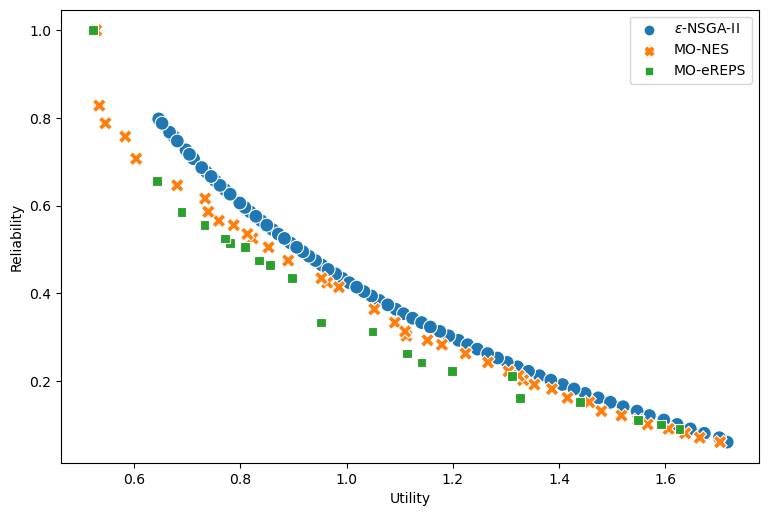

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.concat([ea, nes, repsep])
plt.figure(figsize=(9,6), dpi= 100)
sns.scatterplot(data=data, x="utility", y="reliability", hue="Algorithms", style="Algorithms", s=100)
plt.xlabel("Utility")
plt.ylabel("Reliability")
plt.legend()
plt.show()

# Deep Lake Problem

In [14]:
results_path='../../results/lake_robust_performance_2/'
files=sorted(os.listdir(results_path))
files

['.DS_Store',
 'ea_10th_1274569960',
 'ea_10th_1350287007',
 'ea_10th_1883682950',
 'ea_10th_1926216712',
 'ea_10th_2097286424',
 'ea_10th_2523200676',
 'ea_10th_2861224539',
 'ea_10th_3087161096',
 'ea_10th_3186775264',
 'ea_10th_3624030427',
 'ea_10th_3668976038',
 'ea_10th_3690172787',
 'ea_10th_3885705317',
 'ea_10th_462638671',
 'ea_10th_562732020',
 'ea_10th_617160326',
 'ea_10th_674137616',
 'ea_10th_703574460',
 'ea_10th_956500800',
 'ea_10th_96930842',
 'ea_avg_1274569960',
 'ea_avg_1350287007',
 'ea_avg_1883682950',
 'ea_avg_1926216712',
 'ea_avg_2097286424',
 'ea_avg_2523200676',
 'ea_avg_2861224539',
 'ea_avg_3087161096',
 'ea_avg_3186775264',
 'ea_avg_3624030427',
 'ea_avg_3668976038',
 'ea_avg_3690172787',
 'ea_avg_3885705317',
 'ea_avg_462638671',
 'ea_avg_562732020',
 'ea_avg_617160326',
 'ea_avg_674137616',
 'ea_avg_703574460',
 'ea_avg_956500800',
 'ea_avg_96930842',
 'nes_10th_1274569960_13-03-2023-23-56_best.csv',
 'nes_10th_1274569960_14-03-2023-00-02_high.csv',
 '

In [15]:
ea_10th_hv=[]
ea_10th_std=[]
for i in range(1, 21):
    ea=[]
    ea_std=[]
    ea_files=sorted(os.listdir(results_path + files[i]))
    for j in range(len(ea_files)):
        _, all_outcomes=load_results(results_path + files[i] + "/" + ea_files[j])
        all_std_outcomes=[np.std(all_outcomes[k]) for k in ('utility', 'reliability')]
        all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ('utility', 'reliability'))
        ea.append(all_outcomes)
        ea_std.append(all_std_outcomes)
    ea=pd.DataFrame(ea)
    each_ea_10th_hv=compute_hypervolume(ea, np.array([0, 0]), np.array([2, 1]))
    ea_10th_hv.append(each_ea_10th_hv)
    ea_10th_std.append(np.array(ea_std).mean(axis=0))
    print(files[i])
    # print(ea)
    print(each_ea_10th_hv)
ea_10th_hv=np.array(ea_10th_hv)
print(ea_10th_hv.mean())
print(ea_10th_hv.std())
ea_10th_std=np.array(ea_10th_std)
print(ea_10th_std.mean(axis=0))

ea_10th_1274569960
0.44552345406309324
ea_10th_1350287007
0.4580535640003223
ea_10th_1883682950
0.4607240219537181
ea_10th_1926216712
0.4531655640812492
ea_10th_2097286424
0.45111072035724786
ea_10th_2523200676
0.43360312396490014
ea_10th_2861224539
0.437252545161347
ea_10th_3087161096
0.46891182158626177
ea_10th_3186775264
0.4487484877052534
ea_10th_3624030427
0.45819222251484126
ea_10th_3668976038
0.4294425606918051
ea_10th_3690172787
0.4564915701427726
ea_10th_3885705317
0.4581617540070907
ea_10th_462638671
0.46528231257488917
ea_10th_562732020
0.45696394142427266
ea_10th_617160326
0.44093650546008806
ea_10th_674137616
0.44411576074571535
ea_10th_703574460
0.4837662945683828
ea_10th_956500800
0.46935725911309867
ea_10th_96930842
0.4591949618297649
0.4539499222973057
0.012818745941750852
[0.27246318 0.09543327]


In [16]:
ea_10th_hv=[]
ea_10th_std=[]
for i in range(21, 41):
    ea=[]
    ea_std=[]
    ea_files=sorted(os.listdir(results_path + files[i]))
    for j in range(len(ea_files)):
        _, all_outcomes=load_results(results_path + files[i] + "/" + ea_files[j])
        all_std_outcomes=[np.std(all_outcomes[k]) for k in ('utility', 'reliability')]
        all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ('utility', 'reliability'))
        ea.append(all_outcomes)
        ea_std.append(all_std_outcomes)
    ea=pd.DataFrame(ea)
    each_ea_10th_hv=compute_hypervolume(ea, np.array([0, 0]), np.array([2, 1]))
    ea_10th_hv.append(each_ea_10th_hv)
    ea_10th_std.append(np.array(ea_std).mean(axis=0))
    print(files[i])
    # print(ea)
    print(each_ea_10th_hv)
ea_10th_hv=np.array(ea_10th_hv)
print(ea_10th_hv.mean())
print(ea_10th_hv.std())
ea_10th_std=np.array(ea_10th_std)
print(ea_10th_std.mean(axis=0))

ea_avg_1274569960
0.537131863019193
ea_avg_1350287007
0.551859149775094
ea_avg_1883682950
0.5388412119788233
ea_avg_1926216712
0.5344120530206903
ea_avg_2097286424
0.5434113668028806
ea_avg_2523200676
0.5390364688801158
ea_avg_2861224539
0.5364387246392378
ea_avg_3087161096
0.5452304075132695
ea_avg_3186775264
0.541998561946486
ea_avg_3624030427
0.5367625124246884
ea_avg_3668976038
0.5503801360372376
ea_avg_3690172787
0.5505681661890591
ea_avg_3885705317
0.5437521302302425
ea_avg_462638671
0.5437498009101882
ea_avg_562732020
0.5425115528162577
ea_avg_617160326
0.5435262679070534
ea_avg_674137616
0.541891421952296
ea_avg_703574460
0.545066354850929
ea_avg_956500800
0.5231403234672076
ea_avg_96930842
0.5437685384915212
0.5416738506426236
0.006270927429311738
[0.22491915 0.27602387]


In [17]:
nes_10th_hv = []
nes_10th_std = []
for i in range(41, 81, 2):
    path = files[i]
    nes = pd.read_csv(results_path + path)
    nes_std = nes.iloc[:, 2:]
    nes = nes.iloc[:, :2]
    each_nes_10th_hv = compute_hypervolume(nes, np.array([0, 0]), np.array([2, 1]))
    nes_10th_hv.append(each_nes_10th_hv)
    nes_10th_std.append(np.array(nes_std.values).mean(axis=0))
    print(path)
    # print(nes)
    print(each_nes_10th_hv)
nes_10th_hv = np.array(nes_10th_hv)
nes_10th_std = np.array(nes_10th_std)
print(nes_10th_hv.mean())
print(nes_10th_hv.std())
print(nes_10th_std.mean(axis=0))

nes_10th_1274569960_13-03-2023-23-56_best.csv
0.6572551782606598
nes_10th_1350287007_14-03-2023-00-08_best.csv
0.6605456174766158
nes_10th_1883682950_14-03-2023-00-21_best.csv
0.6521905034073405
nes_10th_1926216712_14-03-2023-00-33_best.csv
0.6596668296628714
nes_10th_2097286424_14-03-2023-00-45_best.csv
0.6832169212398683
nes_10th_2523200676_14-03-2023-00-58_best.csv
0.6767084143495194
nes_10th_2861224539_14-03-2023-01-11_best.csv
0.6718906318679871
nes_10th_3087161096_14-03-2023-01-23_best.csv
0.6527893305330168
nes_10th_3186775264_14-03-2023-01-35_best.csv
0.6769412466759523
nes_10th_3624030427_14-03-2023-01-46_best.csv
0.6555117814829662
nes_10th_3668976038_14-03-2023-01-56_best.csv
0.6529695039796425
nes_10th_3690172787_14-03-2023-02-07_best.csv
0.6591050153718103
nes_10th_3885705317_14-03-2023-02-17_best.csv
0.6894325153667815
nes_10th_462638671_14-03-2023-02-27_best.csv
0.682229456297468
nes_10th_562732020_14-03-2023-02-38_best.csv
0.6535419400472671
nes_10th_617160326_14-03-202

In [18]:
nes_avg_hv = []
nes_avg_std = []
for i in range(81, 121, 2):
    path = files[i]
    nes = pd.read_csv(results_path + path)
    nes_std = nes.iloc[:, 2:]
    nes = nes.iloc[:, :2]
    each_nes_avg_hv = compute_hypervolume(nes, np.array([0, 0]), np.array([2, 1]))
    nes_avg_hv.append(each_nes_avg_hv)
    nes_avg_std.append(np.array(nes_std.values).mean(axis=0))
    print(path)
    # print(nes)
    print(each_nes_avg_hv)
nes_avg_hv = np.array(nes_avg_hv)
nes_avg_std = np.array(nes_avg_std)
print(nes_avg_hv.mean())
print(nes_avg_hv.std())
print(nes_avg_std.mean(axis=0))

nes_avg_1274569960_14-03-2023-03-40_best.csv
0.7166209919923051
nes_avg_1350287007_14-03-2023-03-51_best.csv
0.6696107117604758
nes_avg_1883682950_14-03-2023-04-02_best.csv
0.6699737286582271
nes_avg_1926216712_14-03-2023-04-13_best.csv
0.7142654340852501
nes_avg_2097286424_14-03-2023-04-23_best.csv
0.6718515569520377
nes_avg_2523200676_14-03-2023-04-33_best.csv
0.6677936698583014
nes_avg_2861224539_14-03-2023-04-44_best.csv
0.6736258723955963
nes_avg_3087161096_14-03-2023-04-55_best.csv
0.709715478038563
nes_avg_3186775264_14-03-2023-05-06_best.csv
0.7195310651369149
nes_avg_3624030427_14-03-2023-05-16_best.csv
0.6726330419551831
nes_avg_3668976038_14-03-2023-05-27_best.csv
0.7172905690082758
nes_avg_3690172787_14-03-2023-05-37_best.csv
0.6703402964056586
nes_avg_3885705317_14-03-2023-05-48_best.csv
0.6735205816958549
nes_avg_462638671_14-03-2023-05-58_best.csv
0.6718992567108264
nes_avg_562732020_14-03-2023-06-10_best.csv
0.707027964364041
nes_avg_617160326_14-03-2023-06-20_best.csv


In [19]:
repsep_10th_hv = []
repsep_10th_std = []
for i in range(121, 161, 2):
    path = files[i]
    repsep = pd.read_csv(results_path + path)
    repsep_std = repsep.iloc[:, 2:]
    repsep = repsep.iloc[:, :2]
    each_repsep_10th_hv = compute_hypervolume(repsep, np.array([0, 0]), np.array([2, 1]))
    repsep_10th_hv.append(each_repsep_10th_hv)
    repsep_10th_std.append(np.array(repsep_std.values).mean(axis=0))
    print(path)
    # print(repsep)
    print(each_repsep_10th_hv)
repsep_10th_hv = np.array(repsep_10th_hv)
repsep_10th_std = np.array(repsep_10th_std)
print(repsep_10th_hv.mean())
print(repsep_10th_hv.std())
print(repsep_10th_std.mean(axis=0))

repsep_10th_1274569960_14-03-2023-07-14_best.csv
0.6746128394644426
repsep_10th_1350287007_14-03-2023-07-24_best.csv
0.6325151039703871
repsep_10th_1883682950_14-03-2023-07-34_best.csv
0.6471992327032959
repsep_10th_1926216712_14-03-2023-07-44_best.csv
0.6543612913835091
repsep_10th_2097286424_14-03-2023-07-54_best.csv
0.6647641624831971
repsep_10th_2523200676_14-03-2023-08-05_best.csv
0.6461760160436267
repsep_10th_2861224539_14-03-2023-08-16_best.csv
0.640479160876669
repsep_10th_3087161096_14-03-2023-08-28_best.csv
0.6577243263061788
repsep_10th_3186775264_14-03-2023-08-39_best.csv
0.6844447781692388
repsep_10th_3624030427_14-03-2023-08-50_best.csv
0.6387629719586657
repsep_10th_3668976038_14-03-2023-09-01_best.csv
0.6336144459450667
repsep_10th_3690172787_14-03-2023-09-11_best.csv
0.6385014108564475
repsep_10th_3885705317_14-03-2023-09-22_best.csv
0.6354982549584157
repsep_10th_462638671_14-03-2023-09-32_best.csv
0.6593637637329017
repsep_10th_562732020_14-03-2023-09-43_best.csv
0.

In [20]:
repsep_avg_hv = []
repsep_avg_std = []
for i in range(161, 201, 2):
    path = files[i]
    repsep = pd.read_csv(results_path + path)
    repsep_std = repsep.iloc[:, 2:]
    repsep = repsep.iloc[:, :2]
    each_repsep_avg_hv = compute_hypervolume(repsep, np.array([0, 0]), np.array([2, 1]))
    repsep_avg_hv.append(each_repsep_avg_hv)
    repsep_avg_std.append(np.array(repsep_std.values).mean(axis=0))
    print(path)
    # print(repsep)
    print(each_repsep_avg_hv)
repsep_avg_hv = np.array(repsep_avg_hv)
repsep_avg_std = np.array(repsep_avg_std)
print(repsep_avg_hv.mean())
print(repsep_avg_hv.std())
print(repsep_avg_std.mean(axis=0))

repsep_avg_1274569960_14-03-2023-18-36_best.csv
0.6751189493303676
repsep_avg_1350287007_14-03-2023-18-46_best.csv
0.7161433107894651
repsep_avg_1883682950_14-03-2023-18-56_best.csv
0.6945634044936411
repsep_avg_1926216712_14-03-2023-19-07_best.csv
0.7058909345981791
repsep_avg_2097286424_14-03-2023-19-17_best.csv
0.6801271146437778
repsep_avg_2523200676_14-03-2023-19-27_best.csv
0.672103862405622
repsep_avg_2861224539_14-03-2023-19-37_best.csv
0.7220975854305683
repsep_avg_3087161096_14-03-2023-19-48_best.csv
0.6745016568105564
repsep_avg_3186775264_14-03-2023-19-58_best.csv
0.7115079804502527
repsep_avg_3624030427_14-03-2023-20-08_best.csv
0.6674674092765777
repsep_avg_3668976038_14-03-2023-20-19_best.csv
0.7066954521523025
repsep_avg_3690172787_15-03-2023-00-00_best.csv
0.6733893340382173
repsep_avg_3885705317_15-03-2023-00-11_best.csv
0.6756862208908923
repsep_avg_462638671_15-03-2023-00-22_best.csv
0.7245162908140963
repsep_avg_562732020_15-03-2023-00-32_best.csv
0.720219320269321

In [25]:
ea=[]
# ea_std=[]
ea_files=sorted(os.listdir(results_path + files[24]))
for j in range(len(ea_files)):
    _, all_outcomes=load_results(results_path + files[24] + "/" + ea_files[j])
    # all_std_outcomes=dict((k, np.std(all_outcomes[k])) for k in ('utility', 'reliability'))
    all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ('utility', 'reliability'))
    ea.append(all_outcomes)
    # ea.append((all_outcomes['utility'], all_outcomes['reliability'], all_std_outcomes['utility'], all_std_outcomes['reliability']))
    ea_std.append(all_std_outcomes)
    print(files[24] + "/" + ea_files[j])
ea=pd.DataFrame(ea)
each_ea_hv = compute_hypervolume(ea, np.array([0, 0]), np.array([2, 1]))
# ea.columns=["utility", "reliability", "u_std", "r_std"]
ea["Algorithms"]="$\epsilon$-NSGA-II"
print(each_ea_hv)
ea
# (u_mean, (u_mean-u_25, u_75-u_mean), r_mean, (r_mean-r_25, r_75-r_mean))

ea_avg_1926216712/14-03-2023-00-17_0.tar.gz
ea_avg_1926216712/14-03-2023-00-17_1.tar.gz
ea_avg_1926216712/14-03-2023-00-17_10.tar.gz
ea_avg_1926216712/14-03-2023-00-17_11.tar.gz
ea_avg_1926216712/14-03-2023-00-17_12.tar.gz
ea_avg_1926216712/14-03-2023-00-17_13.tar.gz
ea_avg_1926216712/14-03-2023-00-17_14.tar.gz
ea_avg_1926216712/14-03-2023-00-17_15.tar.gz
ea_avg_1926216712/14-03-2023-00-17_16.tar.gz
ea_avg_1926216712/14-03-2023-00-17_17.tar.gz
ea_avg_1926216712/14-03-2023-00-17_18.tar.gz
ea_avg_1926216712/14-03-2023-00-17_19.tar.gz
ea_avg_1926216712/14-03-2023-00-17_2.tar.gz
ea_avg_1926216712/14-03-2023-00-17_20.tar.gz
ea_avg_1926216712/14-03-2023-00-17_21.tar.gz
ea_avg_1926216712/14-03-2023-00-17_22.tar.gz
ea_avg_1926216712/14-03-2023-00-17_23.tar.gz
ea_avg_1926216712/14-03-2023-00-17_24.tar.gz
ea_avg_1926216712/14-03-2023-00-17_25.tar.gz
ea_avg_1926216712/14-03-2023-00-17_26.tar.gz
ea_avg_1926216712/14-03-2023-00-17_27.tar.gz
ea_avg_1926216712/14-03-2023-00-17_28.tar.gz
ea_avg_192621

,utility,reliability,Algorithms
0,0.665085,0.886758,$\epsilon$-NSGA-II
1,0.626956,0.905444,$\epsilon$-NSGA-II
2,0.800760,0.786071,$\epsilon$-NSGA-II
3,1.071003,0.523212,$\epsilon$-NSGA-II
4,0.700956,0.864071,$\epsilon$-NSGA-II
...,...,...,...
72,1.495876,0.216626,$\epsilon$-NSGA-II
73,1.303584,0.342333,$\epsilon$-NSGA-II
74,1.200106,0.409242,$\epsilon$-NSGA-II
75,0.715518,0.856101,$\epsilon$-NSGA-II


In [26]:
path = files[87]
nes_outcomes = pd.read_csv(results_path + path)
nes = nes_outcomes[['utility', 'reliability']]
# nes['u_std'] = nes_outcomes['utility_std']
# nes['r_std'] = nes_outcomes['reliability_std']
nes_hv = compute_hypervolume(nes, np.array([0, 0]), np.array([2, 1]))
nes["Algorithms"]="MO-NES"
print(path)
print(nes_hv)
nes

nes_avg_1926216712_14-03-2023-04-13_best.csv
0.7142654340852501


/var/folders/sy/ng9rnmxj7qv9hlsm1w06xgpc0000gn/T/ipykernel_21673/2750575259.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nes["Algorithms"]="MO-NES"


,utility,reliability,Algorithms
0,1.712930,0.152222,MO-NES
1,1.760072,0.108192,MO-NES
2,1.167211,0.790424,MO-NES
3,1.047879,0.894455,MO-NES
4,1.709871,0.156455,MO-NES
...,...,...,...
421,1.747572,0.119121,MO-NES
422,1.746159,0.120000,MO-NES
423,0.953354,0.964222,MO-NES
424,1.629448,0.296202,MO-NES


In [27]:
path = files[167]
repsep = pd.read_csv(results_path + path)
repsep = repsep[['utility', 'reliability']]
repsep_hv = compute_hypervolume(repsep, np.array([0, 0]), np.array([2, 1]))
repsep["Algorithms"]="MO-eREPS"
print(path)
print(repsep_hv)
repsep

repsep_avg_1926216712_14-03-2023-19-07_best.csv
0.7058909345981791


,utility,reliability,Algorithms
0,1.380010,0.588030,MO-eREPS
1,1.523678,0.412424,MO-eREPS
2,1.383408,0.586747,MO-eREPS
3,1.642196,0.244152,MO-eREPS
4,0.976208,0.952596,MO-eREPS
...,...,...,...
417,1.034091,0.864040,MO-eREPS
418,1.574972,0.336535,MO-eREPS
419,1.561463,0.359424,MO-eREPS
420,1.549063,0.379747,MO-eREPS


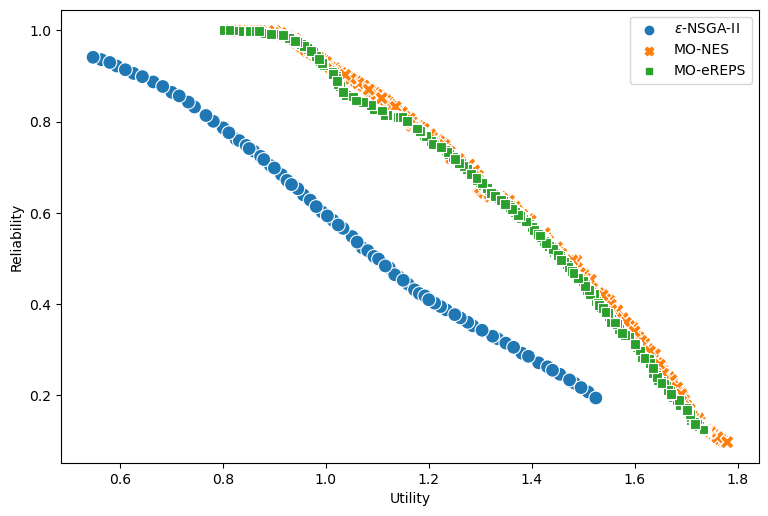

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.concat([ea, nes, repsep])
plt.figure(figsize=(9,6), dpi= 100)
sns.scatterplot(data=data, x="utility", y="reliability", hue="Algorithms", style="Algorithms", s=100)
plt.xlabel("Utility")
plt.ylabel("Reliability")
plt.legend()
plt.show()

In [21]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# data=pd.concat([ea, nes])
# plt.figure(figsize=(9,6), dpi= 100)
# plt.errorbar(x=ea['utility'], y=ea['reliability'], xerr=ea['u_std'], yerr=ea['r_std'], fmt='o', label ="$\epsilon$-NSGA-II")
# plt.errorbar(x=nes['utility'], y=nes['reliability'], xerr=nes['u_std'], yerr=nes['r_std'], fmt='o', label ="Manifold-Based Policy Search")
# # sns.lineplot(data=data, x="utility", y="reliability", hue="Algorithms")
# plt.xlabel("Utility")
# plt.ylabel("Reliability")
# plt.legend()
# plt.show()